# Install dependencies

In [ ]:
!pip install -r requirements.txt

# Import dependencies

In [2]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
import imghdr
import cv2
import os

# GPU setup 

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# Load data and split it for training/validation/test data

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('training_data')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

In [11]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)
print(test_size)
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)
if test_size == 0:
    raise ValueError("Test size is null, you should have at least 140 data images to fix this issue")

1


# Build model

In [12]:
model = Sequential()
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 32)      

# Training model

In [13]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 1s 224ms/step - loss: 2.2656 - accuracy: 0.5104 - val_loss: 1.2556 - val_accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 1s 162ms/step - loss: 0.6357 - accuracy: 0.6875 - val_loss: 0.5861 - val_accuracy: 0.5312
Epoch 3/20
3/3 [==============================] - 1s 164ms/step - loss: 0.4093 - accuracy: 0.7500 - val_loss: 0.3868 - val_accuracy: 0.7812
Epoch 4/20
3/3 [==============================] - 1s 161ms/step - loss: 0.3858 - accuracy: 0.8125 - val_loss: 0.3144 - val_accuracy: 0.9688
Epoch 5/20
3/3 [==============================] - 1s 165ms/step - loss: 0.2595 - accuracy: 0.9583 - val_loss: 0.2078 - val_accuracy: 0.8750
Epoch 6/20
3/3 [==============================] - 1s 162ms/step - loss: 0.1038 - accuracy: 0.9479 - val_loss: 0.0796 - val_accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 1s 164ms/step - loss: 0.0753 - accuracy: 0.9792 - val_loss: 0.0596 - val_accuracy: 0.9688
Epoch 8/20
3/3 [====

# Test resoults

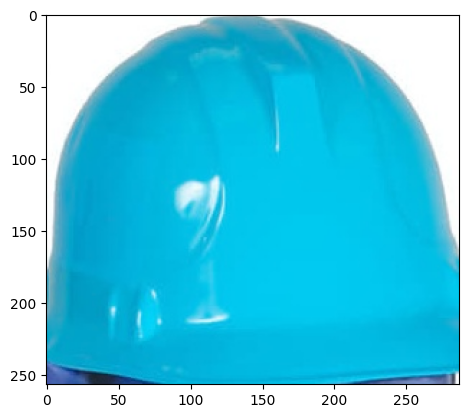

In [19]:
img = cv2.imread('training_data/helmet/builder helmet_4.jpg')
resize = tf.image.resize(img, (256,256))
plt.imshow(img)
plt.show()

In [20]:
my_pred = model.predict(np.expand_dims(resize/255, 0))
my_pred

1/1 [==============================] - 0s 402ms/step


array([[4.1328837e-16]], dtype=float32)

In [21]:
if my_pred < 0.5: 
    print(f'Predicted class is helmet')  
else:
    print(f'Predicted class is No helmet')

Predicted class is helmet


# Save model

In [22]:
model.save(os.path.join('models','my_new_model.h5'))